In [1]:
#import useful libraries 
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#allows the resulting plots to be stored in the notebook
%matplotlib inline   

In [2]:
terror_df=pd.read_csv('E:\ml\Data\globalterrorism.csv',encoding='latin1')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terror_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
terror_df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [6]:
terror_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
#Total Number of attributes are 135 
#We have to Choose the specific attributes from which we can interpret the Global Terrorism Behavior

In [8]:
terror_df=terror_df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','attacktype1_txt','targtype1_txt',
            'natlty1_txt','motive','weaptype1_txt','nkill','nwound','gname','propvalue']]

In [9]:
terror_df.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,success,attacktype1_txt,targtype1_txt,natlty1_txt,motive,weaptype1_txt,nkill,nwound,gname,propvalue
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,Assassination,Private Citizens & Property,Dominican Republic,NaN,Unknown,1.0,0.0,MANO-D,NaN
1,1970,0,0,0,Mexico,North America,Mexico city,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,NaN,Unknown,0.0,0.0,23rd of September Communist League,NaN
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,Assassination,Journalists & Media,United States,NaN,Unknown,1.0,0.0,Unknown,NaN
3,1970,1,0,0,Greece,Western Europe,Athens,1,Bombing/Explosion,Government (Diplomatic),United States,NaN,Explosives,NaN,NaN,Unknown,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,NaN,Incendiary,NaN,NaN,Unknown,NaN


#  1.Visualize the increase in Number of Terror Attacks
# Over the Years from 1970 to 2017

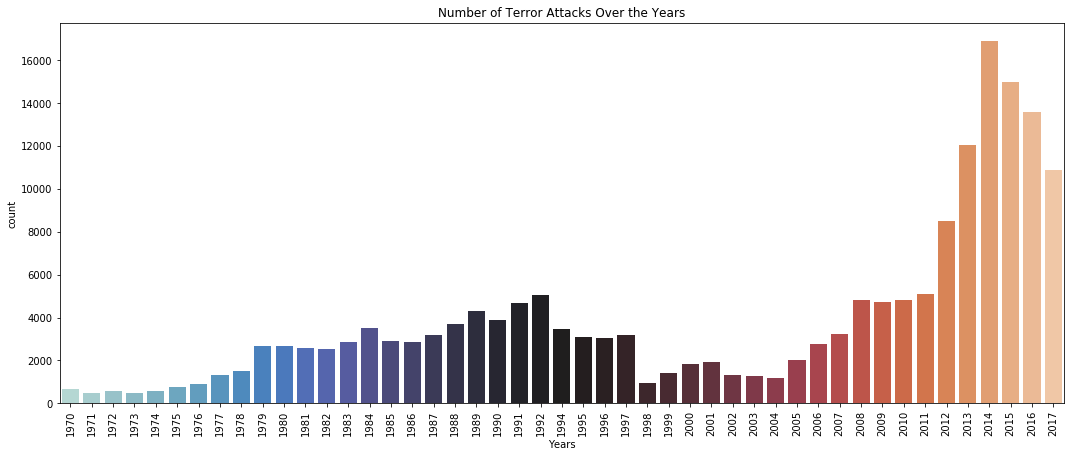

In [57]:
#Counting the No. of attacks per Year !

fig=plt.figure(figsize=(18,7))

sns.countplot(x="iyear",data=terror_df,palette='icefire')  #sns.countplot(terror_df["iyear"])
plt.title("Number of Terror Attacks Over the Years")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.show()
#fig.savefig('Number of Terror Attacks Over the Years',bbox_inches='tight')

# 2.Hot Zones of Terror Attacks

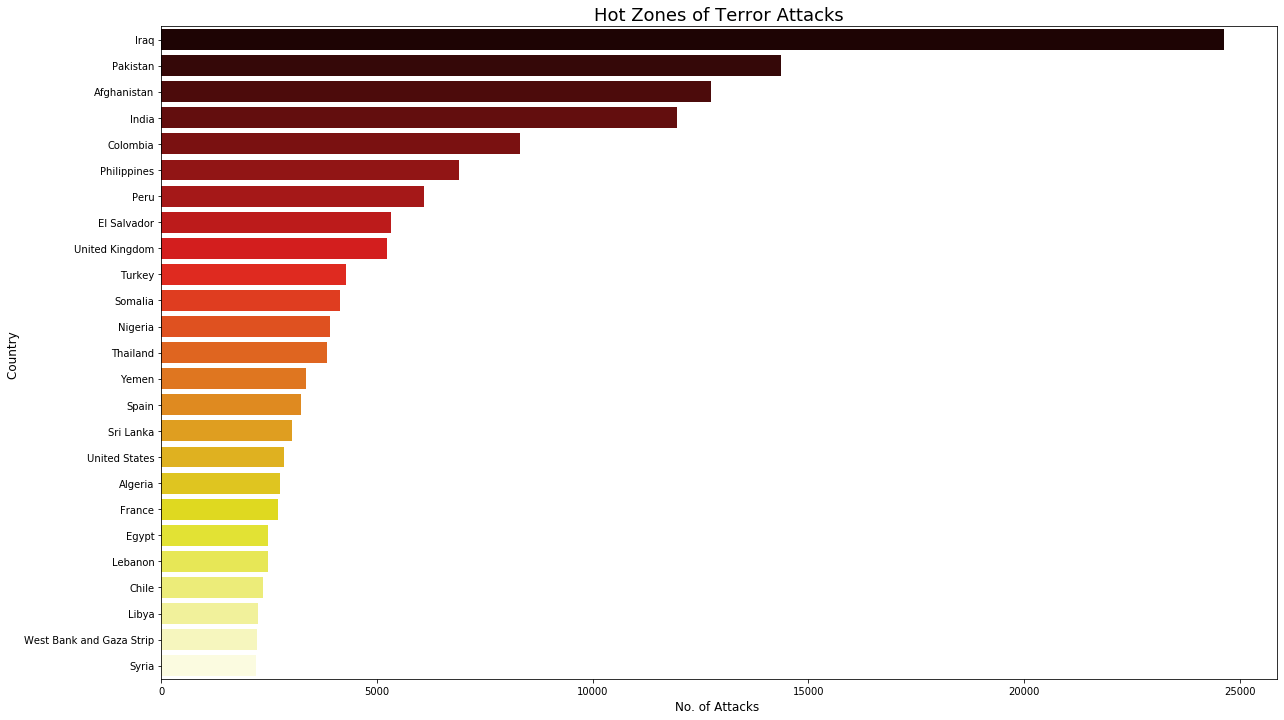

In [58]:
#Countrywise order of top 25 Hot Zones Across the world.
fig=plt.figure(figsize=(20,12))
sns.barplot(x=terror_df['country_txt'].value_counts()[0:25].values, y=terror_df['country_txt'].value_counts()[0:25].index,palette='hot')
plt.title("Hot Zones of Terror Attacks",size=18)
plt.xlabel("No. of Attacks ",size=12)
plt.ylabel("Country ",size=12)
plt.show()
#fig.savefig('Hot Zones Of Terror Attacks',bbox_inches='tight')

In [59]:
'''print("1. Iraq        -----> ",terror_df['country_txt'].value_counts()['Iraq']," attacks")
print("2. Pakistan    -----> ",terror_df['country_txt'].value_counts()['Pakistan']," attacks")
print("3. Afganistan  -----> ",terror_df['country_txt'].value_counts()['Afghanistan']," attacks")
print("4. India       -----> ",terror_df['country_txt'].value_counts()['India']," attacks")
print("5. Colombia    -----> ",terror_df['country_txt'].value_counts()['Colombia']," attacks")'''

'print("1. Iraq        -----> ",terror_df[\'country_txt\'].value_counts()[\'Iraq\']," attacks")\nprint("2. Pakistan    -----> ",terror_df[\'country_txt\'].value_counts()[\'Pakistan\']," attacks")\nprint("3. Afganistan  -----> ",terror_df[\'country_txt\'].value_counts()[\'Afghanistan\']," attacks")\nprint("4. India       -----> ",terror_df[\'country_txt\'].value_counts()[\'India\']," attacks")\nprint("5. Colombia    -----> ",terror_df[\'country_txt\'].value_counts()[\'Colombia\']," attacks")'

In [60]:
idx=1
for i in terror_df['country_txt'].value_counts()[0:5].index:
    print(idx,".",i,"------>")
    print("                            ",terror_df['country_txt'].value_counts()[i],"attacks")
    print()
    idx+=1

1 . Iraq ------>
                             24636 attacks

2 . Pakistan ------>
                             14368 attacks

3 . Afghanistan ------>
                             12731 attacks

4 . India ------>
                             11960 attacks

5 . Colombia ------>
                             8306 attacks



# 3.Most Affected Regions Across the Globe

In [61]:
#counting the Number of Terror Attacks per Regions
data=terror_df.groupby("region_txt")['region_txt'].value_counts()
data

region_txt                   region_txt                 
Australasia & Oceania        Australasia & Oceania            282
Central America & Caribbean  Central America & Caribbean    10344
Central Asia                 Central Asia                     563
East Asia                    East Asia                        802
Eastern Europe               Eastern Europe                  5144
Middle East & North Africa   Middle East & North Africa     50474
North America                North America                   3456
South America                South America                  18978
South Asia                   South Asia                     44974
Southeast Asia               Southeast Asia                 12485
Sub-Saharan Africa           Sub-Saharan Africa             17550
Western Europe               Western Europe                 16639
Name: region_txt, dtype: int64

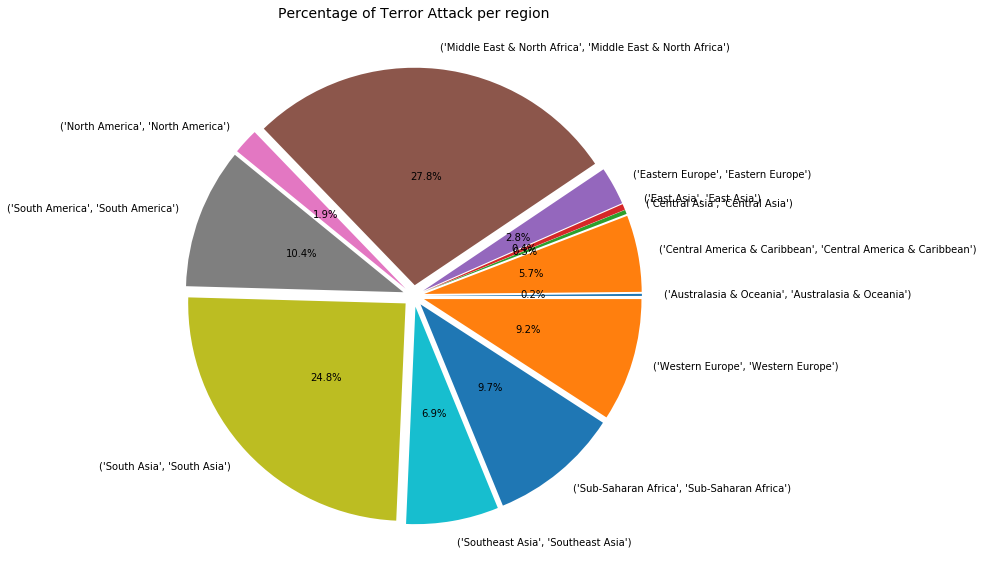

In [62]:
fig=plt.figure(figsize=(18,10))
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%",explode=[0.05]*12, labels=labels, pctdistance=0.5)
plt.title("Percentage of Terror Attack per region", fontsize=14);
#fig.savefig("Percentage Of Terror Attacks per Region",bbox_inches='tight')

# 4.Most Active Terrorist Organization

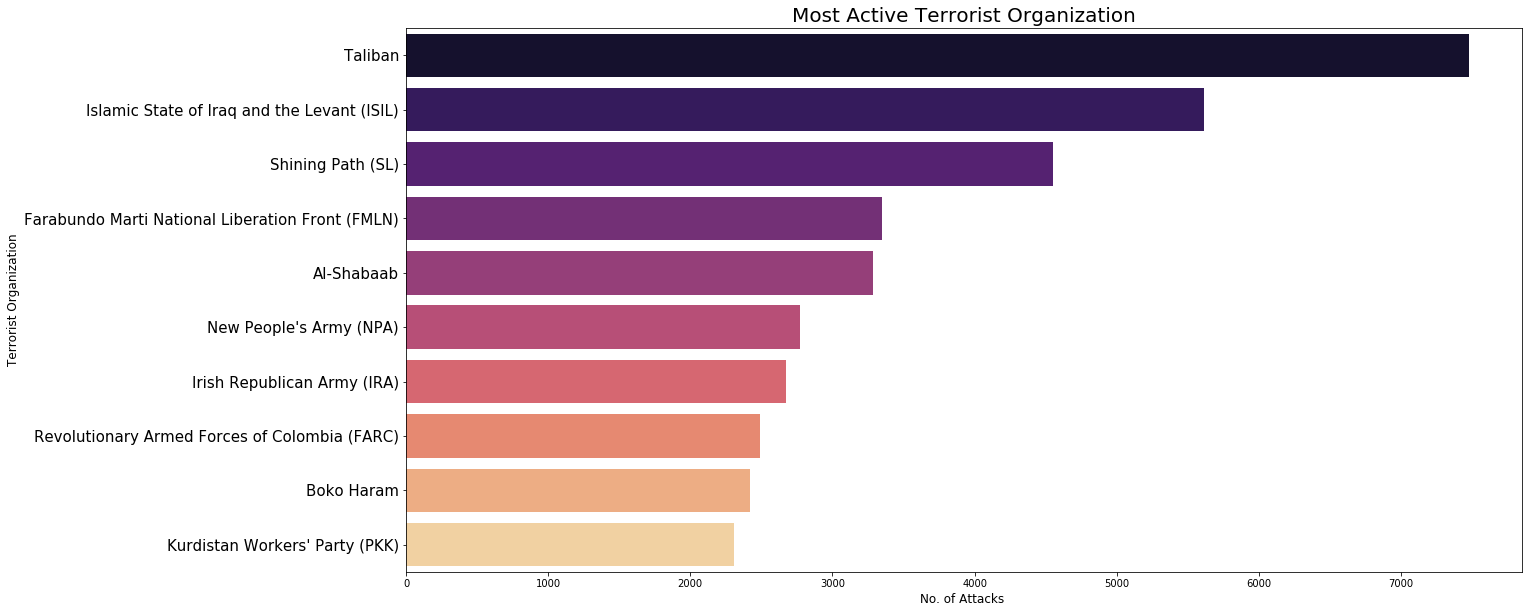

In [63]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x=terror_df['gname'].value_counts()[1:11].values,y=terror_df['gname'].value_counts()[1:11].index,palette='magma')
plt.yticks(size=15)
plt.xlabel("No. of Attacks ",size=12)
plt.ylabel("Terrorist Organization",size=12)
plt.title("Most Active Terrorist Organization",size=20)
plt.show()
#fig.savefig('Most Active Terrorist Oraganization',bbox_inches='tight')

In [64]:
idx=1
print("                         Most Active Terror Organizations")
print()
for i in terror_df['gname'].value_counts()[1:6].index:
    
    print(idx,".",i,"---->")
    print("                                                                  ",terror_df['gname'].value_counts()[i],"attacks")
    print()
    idx+=1

                         Most Active Terror Organizations

1 . Taliban ---->
                                                                   7478 attacks

2 . Islamic State of Iraq and the Levant (ISIL) ---->
                                                                   5613 attacks

3 . Shining Path (SL) ---->
                                                                   4555 attacks

4 . Farabundo Marti National Liberation Front (FMLN) ---->
                                                                   3351 attacks

5 . Al-Shabaab ---->
                                                                   3288 attacks



# Major Targets of Terrorist Organization

In [65]:
#plt.figure(figsize=(20,10))
d=terror_df[['targtype1_txt','iyear']].groupby(['targtype1_txt','iyear']).size()
d
new_df=d.to_frame(name='size').reset_index()
new_df

#plt.plot(terror_df['targtype1_txt'].value_counts()[0:1].values,label=terror_df['targtype1_txt'].value_counts()[0:1].index)
#plt.legend()
#plt.show()

,targtype1_txt,iyear,size
0,Abortion Related,1977,4
1,Abortion Related,1978,6
2,Abortion Related,1979,1
3,Abortion Related,1980,3
4,Abortion Related,1982,7
...,...,...,...
976,Violent Political Party,2013,196
977,Violent Political Party,2014,138
978,Violent Political Party,2015,257
979,Violent Political Party,2016,80


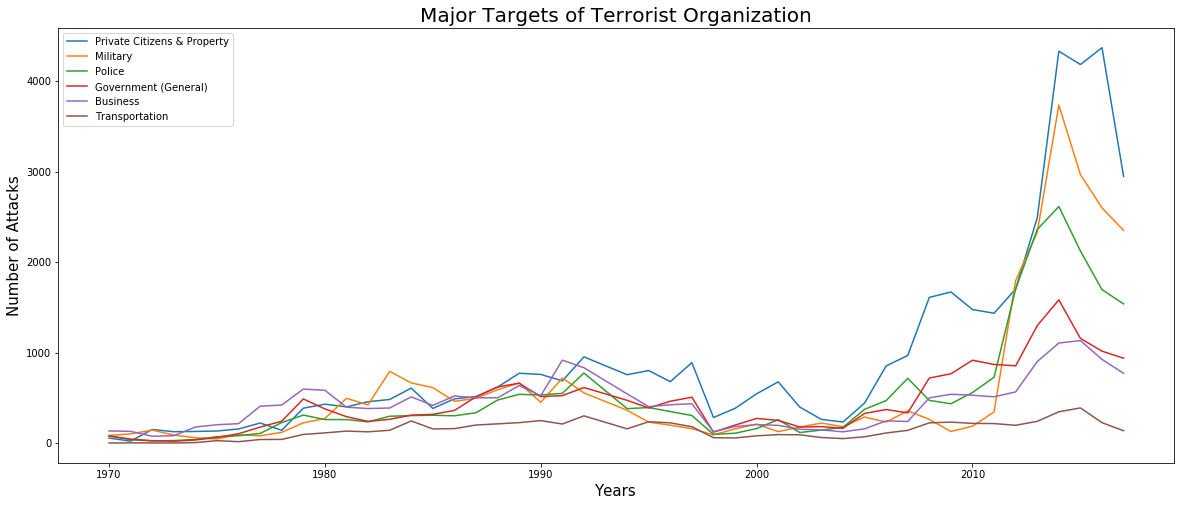

In [66]:
fig=plt.figure(figsize=(20,8))
for i in terror_df['targtype1_txt'].value_counts()[:6].index:
    plt.plot(new_df['iyear'][new_df['targtype1_txt']==i],new_df['size'][new_df['targtype1_txt']==i])

plt.legend(labels=terror_df['targtype1_txt'].value_counts()[0:6].index)
plt.xlabel('Years',size=15)
plt.ylabel('Number of Attacks',size=15)
plt.title('Major Targets of Terrorist Organization',size=20)
plt.show()
fig.savefig('Major Targets Of Terrorist Organization Over the Years',bbox_inches='tight')

# Most Frequent Type of Attacks and Weapons Prefered

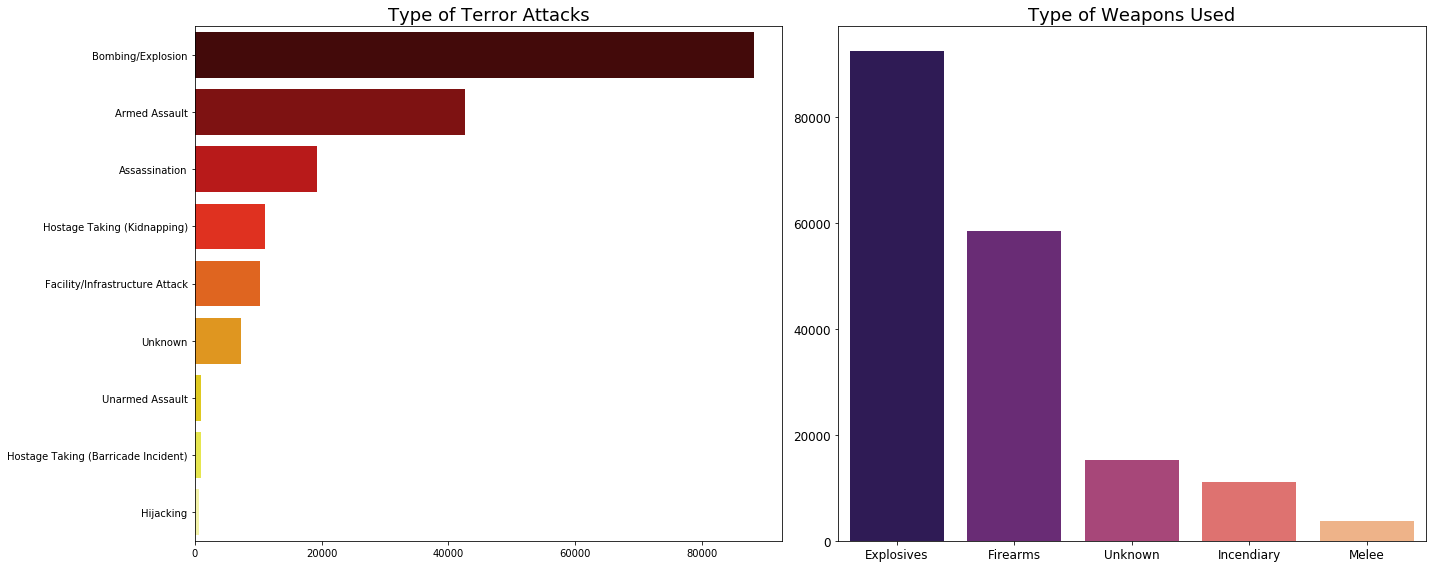

In [67]:
fig,axes=plt.subplots(figsize=(20,8),nrows=1,ncols=2)

plt.yticks(size=12)
plt.xticks(size=12)
sns.barplot(x=terror_df['attacktype1_txt'].value_counts().values, y=terror_df['attacktype1_txt'].value_counts().index,ax=axes[0],palette='hot')
axes[0].set_title("Type of Terror Attacks",size=18)

sns.barplot(y=terror_df['weaptype1_txt'].value_counts()[:5].values, x=terror_df['weaptype1_txt'].value_counts()[:5].index,ax=axes[1],palette='magma')
axes[1].set_title("Type of Weapons Used",size=18)

plt.tight_layout()
plt.show()
fig.savefig('Most Frequent Type Of Attacks and Weapon Prefered',bbox_inches='tight')

# Number of Casuality Due to Terror attacks

In [68]:
terror_df['Casuality']=terror_df['nkill']+terror_df['nwound']
terror_df['Casuality'].fillna(0,inplace=True)
terror_df

,iyear,imonth,iday,extended,country_txt,region_txt,city,success,attacktype1_txt,targtype1_txt,natlty1_txt,motive,weaptype1_txt,nkill,nwound,gname,propvalue,Casuality
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,Assassination,Private Citizens & Property,Dominican Republic,NaN,Unknown,1.0,0.0,MANO-D,NaN,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,NaN,Unknown,0.0,0.0,23rd of September Communist League,NaN,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,Assassination,Journalists & Media,United States,NaN,Unknown,1.0,0.0,Unknown,NaN,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,Bombing/Explosion,Government (Diplomatic),United States,NaN,Explosives,NaN,NaN,Unknown,NaN,0.0
4,1970,1,0,0,Japan,East Asia,Fukouka,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,NaN,Incendiary,NaN,NaN,Unknown,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,1,Armed Assault,Military,Somalia,NaN,Firearms,1.0,2.0,Al-Shabaab,NaN,3.0
181687,2017,12,31,0,Syria,Middle East & North Africa,Jableh,1,Bombing/Explosion,Military,Russia,NaN,Explosives,2.0,7.0,Muslim extremists,-99.0,9.0
181688,2017,12,31,0,Philippines,Southeast Asia,Kubentog,1,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,NaN,Incendiary,0.0,0.0,Bangsamoro Islamic Freedom Movement (BIFM),-99.0,0.0
181689,2017,12,31,0,India,South Asia,Imphal,0,Bombing/Explosion,Government (General),India,NaN,Explosives,0.0,0.0,Unknown,NaN,0.0


In [69]:
lis=[]
total=[]
for i in terror_df['country_txt'].value_counts().index:
    total = terror_df.loc[terror_df['country_txt'] == i, 'Casuality'].sum()
    lis.append([i,total])


In [70]:
lis=sorted(lis,key=lambda x:x[1],reverse=True)
print(*lis[:20])   #country wise casuality over the years from 1970 to 2017

['Iraq', 202982.0] ['Afghanistan', 80213.0] ['Pakistan', 64427.0] ['India', 47108.0] ['Sri Lanka', 29792.0] ['United States', 24469.0] ['Colombia', 23767.0] ['Philippines', 22361.0] ['Nigeria', 21728.0] ['Syria', 21614.0] ['Algeria', 19296.0] ['Somalia', 16720.0] ['Turkey', 16694.0] ['Yemen', 16288.0] ['Peru', 16246.0] ['El Salvador', 16181.0] ['Lebanon', 14765.0] ['Russia', 11126.0] ['Thailand', 10476.0] ['Nicaragua', 10437.0]


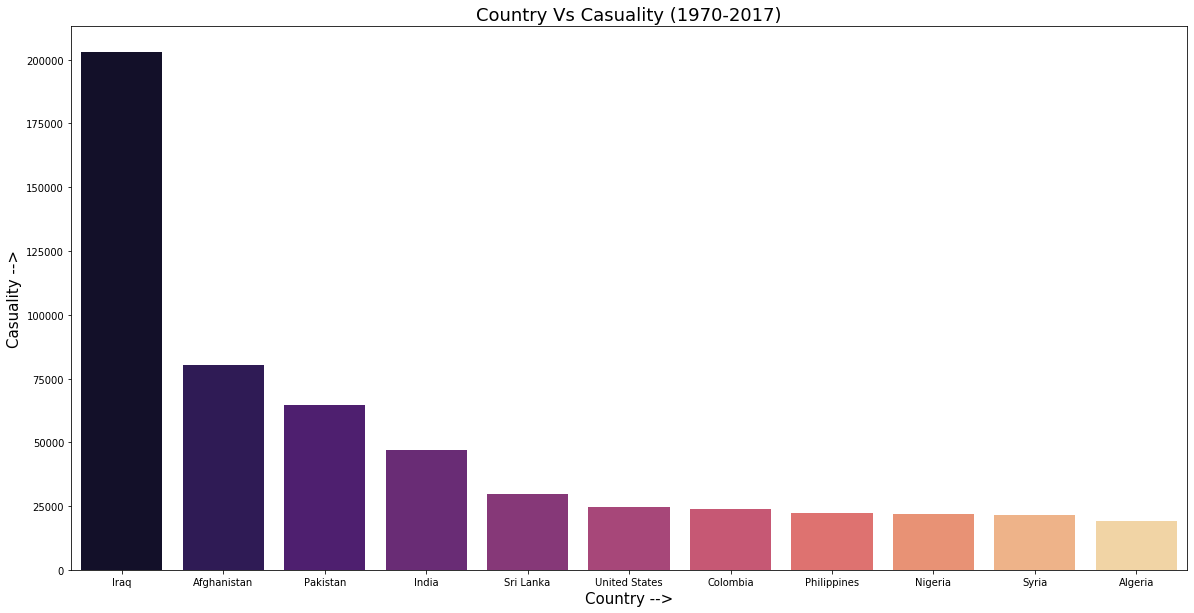

In [71]:
country=[]
casual=[]
for i in lis[:11]:
    country.append(i[0])
    casual.append(i[1])
#print(country)
#print(casual)
fig=plt.figure(figsize=(20,10))
plt.title("Country Vs Casuality (1970-2017)",size=18)
plt.xlabel("Country -->",size=15)
plt.ylabel("Casuality -->",size=15)
sns.barplot(x=country,y=casual,palette='magma')
plt.show()
fig.savefig('Country Vs Casuality From 1970 to 2017',bbox_inches='tight')